In [1]:
from keras_preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled = ImageDataGenerator(1/255)
train_fed = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Intel Image Classification using CNN/seg_train', image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='training', validation_split = 0.2, seed=42)
test_fed = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Intel Image Classification using CNN/seg_test', image_size = (128,128), batch_size=32, label_mode = 'categorical', subset='validation', validation_split = 0.2, seed=42)


Found 14073 files belonging to 6 classes.
Using 11259 files for training.
Found 3000 files belonging to 6 classes.
Using 600 files for validation.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPool2D(2,2),  #1st layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #2nd layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #3rd layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),  #4th layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')                                                       
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)      

In [14]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

In [16]:
erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/Intel Image Classification using CNN/my_model.hdf5', monitor='val_loss', save_best_only=True)
lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

In [17]:
hist = model.fit(train_fed, shuffle=True, epochs=20, validation_data=test_fed,
                           callbacks=[erl_stop, mod_chk, lr_rate], verbose=1)

Epoch 1/20
352/352 [==============================] - 2966s 8s/step - loss: 1.8419 - accuracy: 0.4488 - val_loss: 1.0163 - val_accuracy: 0.6083 - lr: 0.0010
Epoch 2/20
352/352 [==============================] - 21s 59ms/step - loss: 1.0474 - accuracy: 0.5975 - val_loss: 0.8009 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 3/20
352/352 [==============================] - 689s 2s/step - loss: 0.9075 - accuracy: 0.6688 - val_loss: 0.9238 - val_accuracy: 0.6633 - lr: 0.0010
Epoch 4/20
352/352 [==============================] - 21s 60ms/step - loss: 0.8206 - accuracy: 0.6967 - val_loss: 0.7625 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 5/20
352/352 [==============================] - 22s 62ms/step - loss: 0.7091 - accuracy: 0.7468 - val_loss: 0.6333 - val_accuracy: 0.7817 - lr: 0.0010
Epoch 6/20
352/352 [==============================] - 21s 58ms/step - loss: 0.6593 - accuracy: 0.7631 - val_loss: 0.7251 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 7/20
352/352 [==============================] - 21s 5

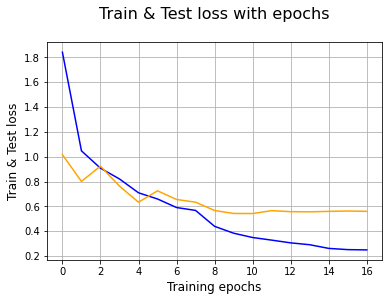

In [18]:
#Plotting results
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='train')
plt.grid(True)
plt.title("Train & Test loss with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test loss", fontsize=12)
plt.show();

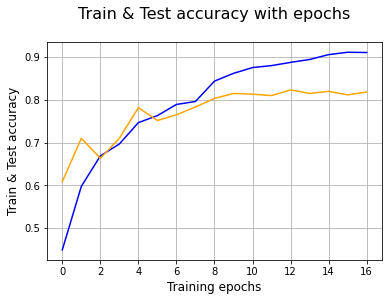

In [19]:
#Plotting results with accuracy
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='train')
plt.grid(True)
plt.title("Train & Test accuracy with epochs\n", fontsize=16)
plt.xlabel("Training epochs", fontsize=12)
plt.ylabel("Train & Test accuracy", fontsize=12)
plt.show();

In [20]:
acc = model.evaluate(test_fed, steps=len(test_fed), verbose=1)
print('%.2f'%(acc[1]*100))

19/19 [==============================] - 1s 38ms/step - loss: 0.5420 - accuracy: 0.8133
81.33
